<h1> 예측 애널리틱스 : Linear Regression 실습 </h1>

![](images/Linear_1.png)

## 모듈 불러오기

import 불러올 패키지명 as 그 패키지를 파이썬에서 사용할 이름

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import load_breast_cancer, load_boston, load_diabetes
import warnings
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as ols

warnings.simplefilter(action='ignore', category=FutureWarning)
# FutureWarning제거

%matplotlib inline

# 한글 폰트 설정
plt.rc('font', family='D2coding')

In [ ]:
#!pip install ~~

## 데이터 불러오기

https://archive.ics.uci.edu/ml/datasets.php

![](images/Linear_2.png)

In [5]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# 데이터 확인
# 패키지 제공이 아닌, 새롭게 로드해서 사용하는 데이터의 경우 
# boston = pd.read_csv('directory/data.csv')
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
# 데이터 y값 확인
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
# 데이터 변수명 확인
# 패키지 제공이 아닌, 새롭게 로드해서 사용하는 데이터의 경우
# boston_columns = boston.columns
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# 데이터 규격 확인
# 패키지 제공이 아닌 새롭게 로드해서 사용하는 데이터의 경우
# boston_shape = boston.shape
boston.data.shape

(506, 13)

## 데이터 전처리

**X** : 독립변수, 예측변수, 입력변수<br>
**y** : 종속변수, 반응변수, 출력변수

In [10]:
# 데이터 프레임 형태로 변환
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [11]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### MinMaxScaler

In [17]:
minmax_scale = MinMaxScaler(feature_range=(0, 5)).fit(boston.data)
boston_data_scaled = minmax_scale.transform(boston.data)

boston_data_scaled[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

- feature_range : 최대 최솟값을 지정하는 매개변수
- 0에서 5사이의 값으로 스케일된 데이터 출력값을 확인할 수 있다.

### Train set / Test set 나누기
- X 학습 데이터 셋, X 테스트 데이터 셋
- y 학습 데이터 셋, y 테스트 데이터 셋

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 선형회귀 모델 구축하기

[statsmodels의 OLS를 사용하여 선형회귀분석 시행(OLS:Ordinary Least Squares)]

  - OLS : 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치($\beta$<sub>1</sub>, $\beta$<sub>2</sub>, ...)구하는 방법
  - 모델 선언 : model = sm.OLS(Y데이터, X데이터)
  - 모델 학습 : model_trained = model.fit()

### 선형회귀 모델 가정 확인하기
 - Linearity(선형성) : 종속변수는 설명변수의 선형 함수이다.
 - Independence(독립성): 종속변수는 관찰값에 조건부로 독립이다.
 - Normality(정규성): 오차의 분포는 정규분포이다.
 - Equal Varaince(등분산성): 오차의 분산은 등분산이다.

In [20]:
X_train = sm.add_constant(X_train) # 선형 회귀 식의 beta 0를 만드는 과정 
model = sm.OLS(y_train, X_train, axis = 1) # OLS data modeling 
model_trained = model.fit() # 모델 fitting

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


![](images/Linear_3.png)

![](images/Linear_7.png)

1. Residual vs Fitted plot에서는 종속변수와 독립변수간에 선형성을 알아볼 수 있습니다.
원래는 잔차와 적합값 사이에 무작위적인 형태 이외에는 어떠한 관계도 보이면 안되나, 위 그래프에서는 이차식처럼 곡선이 보입니다.
그러므로 선형성 가정에 위반됨을 알 수 있고, 이처럼 어떠한 관계를 보일 때에는 회귀모형에 2차식이나 3차식 등의 다항식을 포함시키거나, 로그나 루트를 씌워주는 등 변수변환을 해 주어야 합니다.

2. Normal Q-Q plot에서는 정규성을 확인 할 수 있습니다.
정규성 가정을 잘 만족한다면 각 점들이 45도 각도의 직선위에 있어야 합니다.
위 그래프에서는 가운데 선을 기준으로 각 점들이 위, 아래를 왔다갔다 하는 패턴을 보이고 있으므로
정규성에 살짝 어긋나 보입니다.

3. Scale-Location plot은 등분산성을 확인 할 수 있습니다.
점들이 random한 형태로 나타나야 등분산성을 만족합니다.

4. Residuals vs Leverage plot은 이상관측치를 확인 할 수 있습니다.
숫자가 뜨는 아이들이 보통 이상치 입니다.

### 확률오차의 정규성 확인

C:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


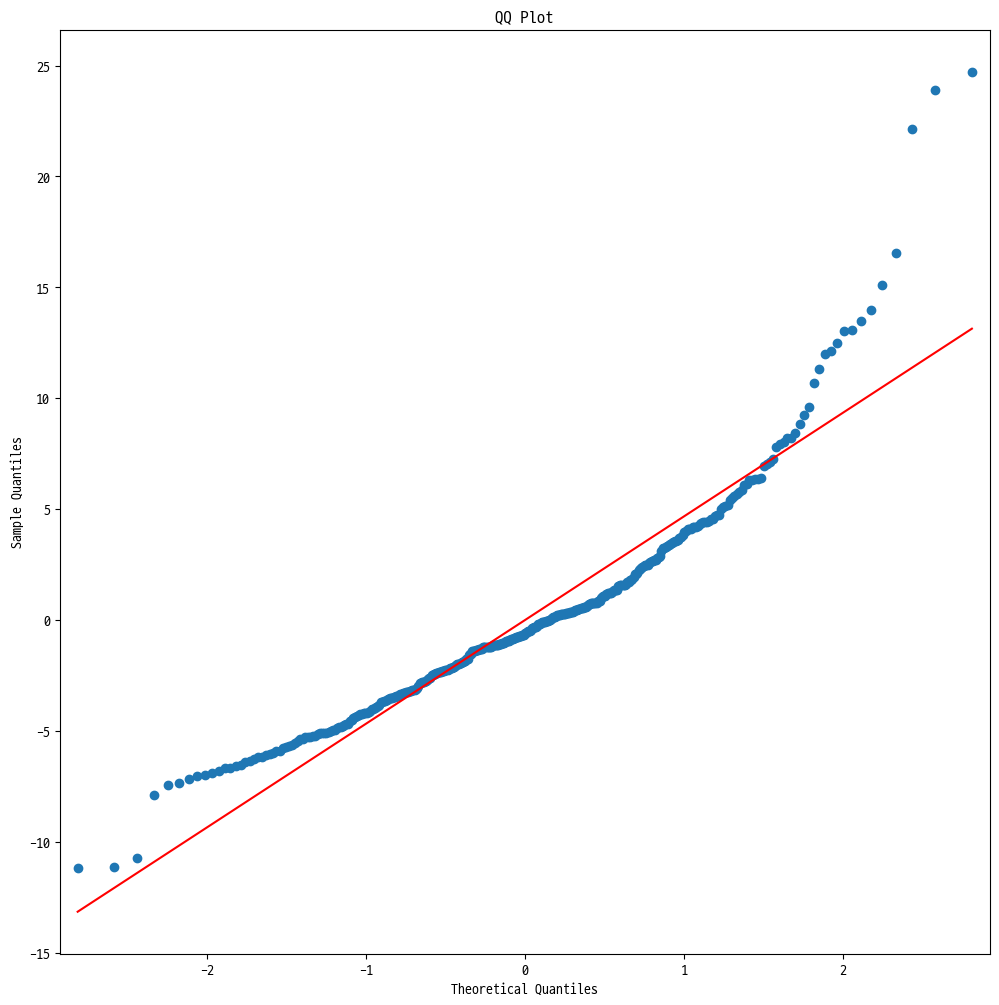

In [21]:
model_residuals = model_trained.resid # 모델의 잔차(예측값 - 타겟값)

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

- 위의 QQ플롯으로 보아 빨간 실선에 잘 따르는 것을 확인할 수 있다.
- 잔차들이 정규성을 따른다면 Q-Q Plot상의 점들이 45도 각도의 직선에 밀접
- 잔차를 대상으로 Shapiro test 를 진행, p값이 기각역보다 크다면 잔차가 정규성을 띈다고 해석

- **샤피로 검정 : 표본으로부터 모집단의 정규성 여부를 확인할 때 사용하는 검정 기법**
- 샘플을 오름차순으로 정렬 --> 표준 정규분포에 추출된 순서 통계량의 이론적 기댓값(Yhat)을 추출
- 기댓값(Yhat)과 오름차순으로 정렬된 샘플과의 상관계수를 계산함 
- --> 상관계수가 1에 가까울수록 추출된 샘플은 정규분포에 가깝다고 판단 ! 
- 귀무가설 : 오차항은 정규분포를 따른다.
- 대립가설 : 오차항은 정규분포를 따르지 않는다.

### 확률오차의 등분산성 확인
- 예측값과 상관없이 오차의 모든 분산이 동일하다는 가정

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

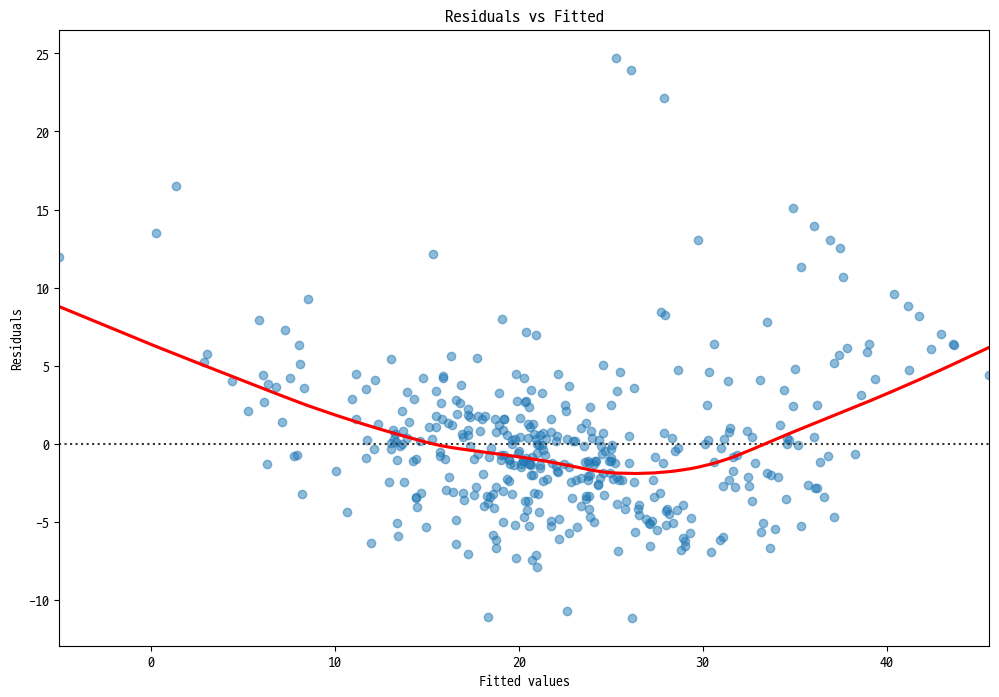

In [22]:
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data = X_train, lowess = True, scatter_kws = {'alpha' : 0.5}, line_kws = {'color' : 'red'}, ax = ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel = 'Fitted values', ylabel = 'Residuals')

- 위의 QQ플롯을 보아 어느 정도 일직선을 따라가는 경향을 보이기 때문에 등분산성을 확인했다고 볼 수 있다.

### 설명 : 통계적으로 해석하기
  - R-squared : 모형의 성능
  - coef(회귀계수) : X가 한 단위 증가할 때 Y의 변화량
  - P>[t] (p-value) : 0.05(유의 수준) 이하일 때 변수가 유의미

In [23]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.02e-110
Time:                        11:03:56   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

- 위 코드를 입력하면, 아래와 같은 summary가 나온다.
- 선형회귀 summary는 sklearn linearregression 에서는 제공하지 않고 
- Statsmodels 패키지의 linearregression 모델에게만 제공한다. 
  - 귀무가설 : X(독립변수)의 계수(b1)가 0이다
  - coef : 각 변수별 계수 추정치
  - 피쳐 들 중 첫번째 const : y절편 (beta0)
  - std err : 계수 추정치의 표준편차
  - t : t검정 통계량 값
    - 즉, t값이 크면 추정된 계수가 0이 아니라는 것
    - 귀무가설 (X(독립변수)의 계수(b1)가 0이다) 기각 
  - pvalue가 0.1보다 큰 경우 귀무가설 통과  
    - 여기서 귀무가설은 "X(독립변수)의 계수(b1)가 0이다"
    - 즉 pvalue가 0.1보다 큰 독립변수의 계수는 0이다.
    - age, indus 피쳐는 유의하지 않다고 해석가능  → 해당 피쳐는 제외하고 모델 재설계 해야함. 

![](images/Linear_4.png)

- 앞서 summary값에서 베타값에 대한 p-value 값이 나온다. p-value 값을 토대로 어느 정도 해석을 하고 설명을 했다고 하면, 그 설명을 바탕으로 개선을 해야 한다.
- summary 값을 보면 INDUS, AGE 변수는 각각 p-value 값이 0.962, 0.476이 나왔다. 이 값은 상대적으로 유의하지 않다고 해석을 할 수 있기 때문에 이 두 가지 변수를 제거하고 다시 모델을 구축한다.

In [24]:
model = sm.OLS(y_train, X_train.drop(['INDUS', 'AGE'], axis = 1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.19e-112
Time:                        11:08:52   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

- 위의 결과값을 보면, 성능에는 큰 변화가 없지만 전 결과보다 통계적으로 유의미하다고 볼 수 있다.

## 예측 : 미래의 반응변수 값 예측하기
  - 위의 과정을 토대로 설명을 했다면 이제 예측을 해야 한다.
  - 학습에 사용된 값이 들어왔을 때 예측이 되는지 확인을 한다.

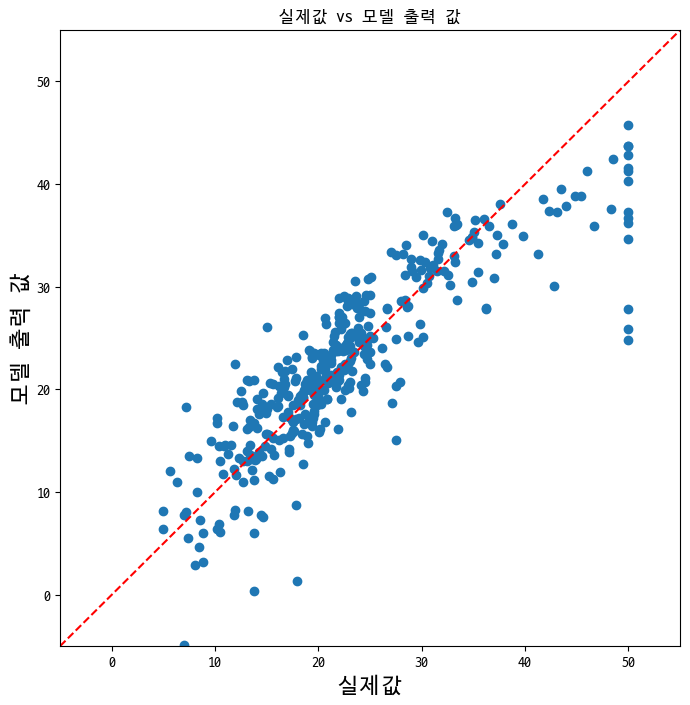

In [25]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize = (8,8))
plt.title('실제값 vs 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 55], [-5, 55], ls = '--', c = 'red')
plt.xlabel('실제값', size = 16)
plt.ylabel('모델 출력 값', size = 16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

- 빨간 점선을 따라야 올바른 예측이 된다고 해석할 수 있다. 위의 그래프를 보면 어느 정도 유사한 패턴으로 예측을 하고 있다고 볼 수 있다.

In [26]:
# Test셋에 대해서도 예측값을 뽑아낼 수 있다.
X_test = sm.add_constant(X_test)

In [27]:
y_test_pred = model_trained.predict(X_test.drop(['INDUS', 'AGE'], axis=1))
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

- 위와 같이 예측값이 나오면 여러 가지 측도를 활용을 해서 해당 모델의 성능을 정량적인 지표로 도출할 수 있다.

### Mean Squared Error(평균 제곱 오차)

In [28]:
print(mean_squared_error(y_test, y_test_pred))

23.063158240353737


### Root Mean Squared Error(제곱근 평균 제곱 오차)
- RMSE는 MAE와 유사하나 오차에 대해 제곱을 한 다음 모든 값을 더하여 평균을 낸 후 제곱근을 구하는 방식
- MAE에 비해 상대적으로 값의 차이가 더 커지게 되어 있다.
- 만약 차이가 크게 나는 값에 대해서 페널티를 주고 싶다면 RMSE 값을 사용하는 것이 더 좋은 선택이다.

In [29]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

4.802411710833812


### Mean Absolute Error(평균 절대 오차)
- 평균 절대 잔차로 예측값과 실제값의 차이를 절대값으로 표현하는 지표
- 가장 큰 장점은 직관적으로 예측값과 실측값의 차이가 어느 정도인지 알수 잇다는 것이다.
- 만약 MAE가 300이라면, 두 값의 차이가 평균적으로 300이라고 예상할 수 있다.

In [30]:
print(mean_absolute_error(y_test, y_test_pred))

3.512302350895111


### Mean Absolute Percentage Error(평균 절대 백분율 오차)

In [31]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(mean_absolute_percentage_error(y_test, y_test_pred))

43.945751640390874


### R squared(결정계수)
- 두 개의 값의 증감이 얼마나 일관성을 가지는지 나타내는 지표
- 즉, 예측값이 크면 클수록 실제값도 커지고, 예측값이 작으면 실제값도 작아지는 형식이다.
- 결정계수는 두 개의 모델 중 어떤 모델이 조금 더 상관성이 있는지를 나타낼 수 있지만, 값의 차이 정도가 얼마인지는 나타낼 수 없다는 한계가 있다.

![](images/Linear_5.png)

In [32]:
print(r2_score(y_test, y_test_pred))

0.638940321549958


### 최종 결과정리

In [33]:
print('Training MSE : {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE : {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE : {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2 : {:.3f}'.format(r2_score(y_train, y_train_pred)))

Training MSE : 21.881
Training RMSE : 4.678
Training MAE : 3.315
Training MAPE : 51.174
Training R2 : 0.756


In [34]:
print('Testing MSE : {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE : {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE : {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2 : {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE : 23.063
Testing RMSE : 4.802
Testing MAE : 3.512
Testing MAPE : 43.946
Testing R2 : 0.639


- testing에 대한 성능이 Training에 대한 성능보다 낮은데 이 이유는 일반적으로 Training셋은 학습에 사용된 데이터이기 때문에 비교적으로 Testing에 대한 성능이 높게 나온다.

## StatModels VS Sklearn

![](images/Linear_6.png)